In [ ]:
#Data Set 1 https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries?select=ds_salaries.csv
#Data Set 2 https://www.kaggle.com/code/valchovalev/real-estate-world-3-d-top-500-cities-plus-dtree/input?select=real_estator_world_may2021.csv
#Data Set 3 https://pkgstore.datahub.io/core/country-list/data_csv/data/d7c9d7cfb42cb69f4422dec222dbbaa8/data_csv.csv

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 

*DATA SET 1 (ds.salaries.csv) CLEANING AND OBSERVATIONS*


In [ ]:
df1='C:/Users/nheav/Project/ds.salaries.csv'

In [93]:
# Importing Salaries Data Set 1 from local folder and checking the column keys and layout
df1='C:/Users/nheav/DataAnalytics/DAProject/ds.salaries.csv'
sals=pd.read_csv(df1,index_col=[0])
sals.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [26]:
sals.isnull().sum() #checking for null values

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [32]:
sals=pd.read_csv(df1) # Reset to df1 and check for duplicates
sals.duplicated().sum() 

0

In [48]:
sals.info() # Variable description

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [47]:
sals.describe().T # Describe intiger values in transposed method output

,count,mean,std,min,25%,50%,75%,max
work_year,607.0,2021.405272,6.921330e-01,2020.0,2021.0,2022.0,2022.0,2022.0
salary,607.0,324000.062603,1.544357e+06,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_in_usd,607.0,112297.869852,7.095726e+04,2859.0,62726.0,101570.0,150000.0,600000.0
remote_ratio,607.0,70.922570,4.070913e+01,0.0,50.0,100.0,100.0,100.0


In [55]:
# Viewing the data by country/location averages using groupby and mean methods
loc_avg=sals.groupby(['company_location'])
loc_avg.mean()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
company_location,,,,,
AE,328.333333,2021.333333,1.000000e+05,100000.000000,66.666667
AS,244.000000,2021.000000,1.335000e+06,18053.000000,100.000000
AT,202.750000,2020.750000,6.400000e+04,72920.750000,25.000000
AU,506.000000,2022.000000,1.303333e+05,108042.666667,83.333333
BE,181.500000,2021.000000,7.250000e+04,85699.000000,75.000000
BR,203.000000,2021.000000,6.520000e+04,18602.666667,33.333333
CA,344.833333,2021.566667,1.153067e+05,99823.733333,75.000000
CH,365.500000,2021.500000,2.750000e+05,64114.000000,0.000000
CL,177.000000,2021.000000,3.040000e+07,40038.000000,100.000000


In [76]:
# Viewing the data by job title using groupby and aggregate methods
sals=pd.read_csv(df1,index_col=[0])
sals.groupby(['job_title']).agg(['mean','median'])

work_year                salary  \
                                                 mean  median          mean   
job_title                                                                     
3D Computer Vision Researcher             2021.000000  2021.0  4.000000e+05   
AI Scientist                              2021.142857  2021.0  2.905714e+05   
Analytics Engineer                        2022.000000  2022.0  1.750000e+05   
Applied Data Scientist                    2021.600000  2022.0  1.724000e+05   
Applied Machine Learning Scientist        2021.500000  2021.5  1.413500e+05   
BI Data Analyst                           2020.833333  2021.0  1.902045e+06   
Big Data Architect                        2021.000000  2021.0  1.250000e+05   
Big Data Engineer                         2020.625000  2021.0  4.550000e+05   
Business Data Analyst                     2021.000000  2021.0  3.550000e+05   
Cloud Data Engineer                       2021.000000  2021.0  1.400000e+05   
Computer Vision Engineer                  2021.166667  2021.0  8.350000e+04   
Computer Vision Software Engineer         2021.333333  2021.0  1.003333e+05   
Data Analyst                              2021.680412  2022.0  9.660496e+04   
Data Analytics Engineer                   2021.250000  2021.0  6.175000e+04   
Data Analytics Lead                       2022.000000  2022.0  4.050000e+05   
Data Analytics Manager                    2021.571429  2022.0  1.271343e+05   
Data Architect                            2021.727273  2022.0  1.778739e+05   
Data Engineer                             2021.590909  2022.0  1.792106e+05   
Data Engineering Manager                  2020.600000  2021.0  1.197998e+05   
Data Science Consultant                   2020.714286  2021.0  1.227143e+05   
Data Science Engineer                     2021.333333  2021.0  8.450000e+04   
Data Science Manager                      2021.333333  2021.0  1.062599e+06   
Data Scientist                            2021.391608  2022.0  5.083472e+05   
Data Specialist                           2021.000000  2021.0  1.650000e+05   
Director of Data Engineering              2021.000000  2021.0  1.412500e+05   
Director of Data Science                  2021.000000  2021.0  1.932857e+05   
ETL Developer                             2022.000000  2022.0  5.000000e+04   
Finance Data Analyst                      2021.000000  2021.0  4.500000e+04   
Financial Data Analyst                    2021.500000  2021.5  2.750000e+05   
Head of Data                              2021.400000  2021.0  1.564000e+05   
Head of Data Science                      2021.500000  2021.5  1.467188e+05   
Head of Machine Learning                  2022.000000  2022.0  6.000000e+06   
Lead Data Analyst                         2020.666667  2021.0  5.690000e+05   
Lead Data Engineer                        2020.833333  2021.0  1.403333e+05   
Lead Data Scientist                       2020.333333  2020.0  1.101667e+06   
Lead Machine Learning Engineer            2022.000000  2022.0  8.000000e+04   
ML Engineer                               2021.000000  2021.0  2.676667e+06   
Machine Learning Developer                2021.666667  2022.0  1.000000e+05   
Machine Learning Engineer                 2021.317073  2021.0  2.727179e+05   
Machine Learning Infrastructure Engineer  2021.000000  2021.0  9.733333e+04   
Machine Learning Manager                  2020.000000  2020.0  1.570000e+05   
Machine Learning Scientist                2021.250000  2021.0  1.584125e+05   
Marketing Data Analyst                    2021.000000  2021.0  7.500000e+04   
NLP Engineer                              2022.000000  2022.0  2.400000e+05   
Principal Data Analyst                    2021.500000  2021.5  1.225000e+05   
Principal Data Engineer                   2021.000000  2021.0  3.283333e+05   
Principal Data Scientist                  2021.000000  2021.0  2.067143e+05   
Product Data Analyst                      2020.000000  2020.0  2.350000e+05   
Research Scient

The job title output is very diverse and this study particular interest is Data Analyst which requires further refinement

In [103]:
# grouping the data by job title 'data analyst' using groupby and get_group to output to a new data set da_group.csv
sals=pd.read_csv(df1,index_col=[0])
sals.groupby(['job_title']).get_group(('Data Analyst')).to_csv('da_group.csv')

In [108]:
# new data set specific to Data Analyst role
datyst='C:/Users/nheav/DataAnalytics/DAProject/da_group.csv'
dat=pd.read_csv(datyst,index_col=[4])
dat.head()

,Unnamed: 0,work_year,experience_level,employment_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
job_title,,,,,,,,,,,
Data Analyst,5,2020,EN,FT,72000,USD,72000,US,100,US,L
Data Analyst,14,2020,MI,FT,85000,USD,85000,US,100,US,L
Data Analyst,15,2020,MI,FT,8000,USD,8000,PK,50,PK,L
Data Analyst,34,2020,MI,FT,41000,EUR,46759,FR,50,FR,L
Data Analyst,38,2020,EN,FT,10000,USD,10000,NG,100,NG,S


<AxesSubplot:xlabel='company_location'>

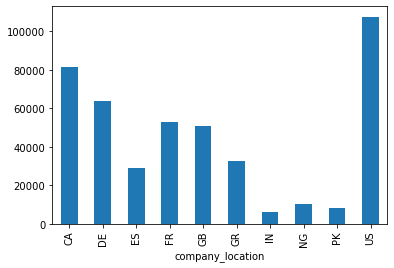

In [29]:
# Data Analyst-mean salary plot by company location in USD
import pandas as pd
datyst='C:/Users/nheav/DataAnalytics/DAProject/da_group.csv'
dat=pd.read_csv(datyst,index_col=[4])
anyst_jobs=dat.groupby(['company_location'])
anyst_jobs.mean()
anyst_sal=anyst_jobs.mean()
saljob=anyst_sal['salary_in_usd']
saljob.plot(kind="bar",x='USD', align='center',width=.5)

<AxesSubplot:title={'center':'Data Analysts % Remote working'}, ylabel='remote_ratio'>

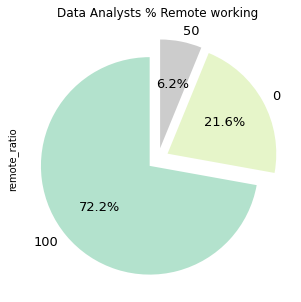

In [32]:
# Plotting the remote ratio breakout for Data Analysts
kwargs = dict(
    startangle = 90,
    colormap   = 'Pastel2',
    fontsize   = 13,
    explode    = (0.1,0.1,0.1),
    figsize    = (60,5),
    autopct    = '%1.1f%%',
    title      = 'Data Analysts % Remote working'
)

dat['remote_ratio'].value_counts().plot.pie(**kwargs)